# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from datetime import datetime
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import get_single_color_func

pd.set_option('display.max_colwidth', None)

# Load Dataset

In [3]:
aspect_df = pd.read_csv("0ShotResult_xlm-roberta.csv")
sentiment_df = pd.read_csv("SentClfResult_Indo-Roberta.csv")
raw_df = pd.read_csv("data_preprocessed.csv")

In [4]:
# Merge Datasets
data_merge = pd.merge(aspect_df, sentiment_df, how='inner', on=['id','sequence'])

In [5]:
data = data_merge.drop(['id','sequence'], axis=1)

In [6]:
data.head()

,driving range,battery life,charging time,charging infrastructure,price value,incentive policy,environmental concern,look and design,sentiment
0,False,False,False,False,True,True,False,False,neutral
1,False,False,False,False,False,False,False,False,negative
2,False,False,False,False,True,True,False,False,positive
3,False,False,False,True,True,False,False,False,neutral
4,False,False,False,False,False,False,False,False,neutral


In [7]:
result = data.groupby('sentiment').sum()

In [8]:
result

,driving range,battery life,charging time,charging infrastructure,price value,incentive policy,environmental concern,look and design
sentiment,,,,,,,,
negative,45,503,111,1043,2192,3765,1795,118
neutral,74,367,38,2019,2231,4133,1874,117
positive,93,324,76,1055,2242,1542,2517,358


# Qualitative Analysis (Textual Analysis)

In [9]:
incentive_policy = data_merge.loc[(data_merge['incentive policy'] == True) & (data_merge['sentiment'] == 'positive')]

In [10]:
incentive_policy[['id', 'sequence','sentiment']].sample(10)

,id,sequence,sentiment
21716,1659416661987041280,Lebih murah daripada motor listrik yang sudah dapat subsidi,positive
21221,1659929363415199745,"Subsidi Motor Listrik Konversi ke Motor Listrik tidak masalah. Namun untuk Mobil baiknya Subsidi hanya diberikan untuk Angkutan Umum Kendaraan Dinas saja..Utk Kendaraan Pribadi hanya berlaku bagi yang Konversi ke Kendaraan Listrik, bukan untuk pembelian baru.Dananya dari PKB yang masuk APBN.",positive
717,1618781185165135872,"Insentif kendaraan listrik kepada pembuat/produsen kendaraan listrik BUKAN kepada pembeli/konsumen, lebih manfaat",positive
2405,1615723363552604161,"Sebenernya seruan peralihan ke kendaraan listrik juga bagian dari otak pembisnis, makanya gencar banget ini istilah beralih ke kendaraan ramah lingkungan. Padahal campaign yang bagus dari pemerintah tuh harusnya ""saatnya beralih ke layanan transportasi publik"" begitu lhooo~",positive
12515,1636456013531611136,"terlepas dari permasalahan transportasi umum, subsidi kendaraan listrik ini bagus. why? syarat kendaraan listrik yang bisa mendapat subsidi wajib memiliki TKDN min. 40%. ini bisa mendorong pabrikan2 untuk merakit dan membeli komponen kendaraan listriknya di Indonesia.",positive
3116,1613846647058075651,Pemerintah terus mendorong pembangunan ekosistem kendaraan listrik atau electric vehicle (EV) melalui produksi baterai kendaraan listrik pertama di Indonesia yang ditargetkan akan mulai pada tahun 2024 mendatang. 𝗝𝗼𝗸𝗼𝘄𝗶 𝗣𝗿𝗼 𝗛𝗶𝗹𝗶𝗿𝗶𝘀𝗮𝘀𝗶 𝗦𝗗𝗔,positive
9897,1639462584339554306,"Kendaraan listrik suplai listriknya dari PLTU yang menggunakan batu bara (polusi juga)..tapi di subsidi juga produk kendaraan nya.. Yg jadi produsen baterai nya salah satu orang kuat di lingkaran istana.Suplier batu bara yang paling mendominasi orang kuat itu juga. ""Adil bang Oligarki""",positive
9765,1639944615712243713,"Bkn namanya kalau tidak Kerja Cepat, Gak Kerja Nyata Gk Memberikan Hasil Krja yang Trbaik Kali ini ada 100 Mobil Listrik Motif Batik Menyerbu Indonesia. pemerintah Memberikn Insentif kepada pembeli Kendaraan Listrik. Ayo Tunggu Ap lg? Segera Ambil Bagian",positive
14120,1633807573534248967,"Yg penting pemasukan jauh lebih gede. Ayo pajakin segalanya bu sri. Kemaren2 sudah sukses pajak topup game sekarang waktunya pajakin becak, motor listrik kalau perlu orang makan diwarteg pajakin. Bravo srimul.",positive
9067,1640969549200920576,Jadi kuncinya harga mobil listrik harus bisa ditekan lagi biar bisa irit. Minimal disamakan dengan dengan harga mbl bbm.,positive


In [11]:
price_value = data_merge.loc[data_merge['price value'] == True]

In [12]:
price_value[['sequence', 'sentiment']].sample(10)

,sequence,sentiment
5957,"jual Pajero EV, murah. harga dm",positive
6826,"Eh sekarang pengisian daya kendaraan listrik sudah tidak perlu repot lagi, lebih murah dan dapat dilakukan dirumah dengan home charging services",positive
2333,"Naiknya harga BBM menjadi momentum kendaraan listrik, khususnya GESITS sebagai pilihan masyarakat mulai beralih menggunakan kendaraan listrik. WIMA ke depan akan berkomitmen untuk meningkatkan kualitas dan pelayanan, serta terus mendorong perluasan pasar untuk sepeda motor listrik GESITS.",positive
12160,"Menarik kan? Yuk i kut langkah"" berikut untuk borong motor listrik idamanmu di PLN Mobile!",neutral
16940,Program subsidi mobil listrik bang. Hahaha,negative
9378,"Udah satset, compact, irit, canggih lagi ya. Siapa yang tidak ingin punya Mobil Perang Air Ev sih? Pengen amat punya",positive
14118,"Saham Saham Nikel !! Trend Kendaraan Listrik sudah mulai bergerak, 3 Sah... via",neutral
19018,Enak kalau dikasih kak😋🤣 mengomong mengomong ikutan giveaway motor listrik yakkk🔥,positive
14404,"Mobil listrik termahal di dunia tahun 2021 adalah Porsche Taycan Turbo S yang dijual dengan harga 2,6 milyar rupiah. Mobil listrik mahal... -",negative
3582,Check itu out 👉 Nama Produk: Selis Mobil listrik tipe Wisata 4 Seat Harga Produk: Rp137.500.000,neutral


In [13]:
env_concern = data_merge.loc[data_merge['environmental concern'] == True]

In [14]:
env_concern[['sequence','sentiment']].sample(10)

,sequence,sentiment
1857,"total emisi mobil listrik dengan sumber listrik pltu batubara masih lebih kecil daripada total emisi mobil berbahan bakar fosil,tp subsidi mobil listrik pribadi memperparah pengrusakan alam di daerah tambang bahan baku nikel. 1 tongkang berkapasitas 13rb ton/ 1 milyar tusuk sate ayam.",neutral
11526,pasti ramah lingkungan pakai kendaraan listrik begini,positive
4232,"Di Jogja sudah tidak nyaman jika pakai mobil, mestinya dengan sepeda listrik atau motor.listrik. karena kalau macet supaya bbm nya tidak banyak terbuang percuma.",negative
9860,"100 mobil listrik bermotif batik mulai di jajaki menteri BUMN dengan pabrikan mobil raksasa asal Korea Selatan, Hyundai Motors. . Semoga berhasil untuk mengurangi emisi karbon dan mengurangi impor BBM.",neutral
3515,"kalau kekeh wfo 100%, iya diurai kemacetannya. karena commute adalah faktor yang paling bikin orang tidak suka wfo. tapi pemerintah pada sibuk fokus ngejual mobil listrik revitalisasi dibanding nambahin jam transit transport publik. kebanyakan mobil juga tetap tidak bagus buat lingkungan bestie",negative
3199,"Mau dong, memakai motor listrik atau mobil listrik itu kan bagus bisa mengurangi polusi, otomatis lingkungan jadi lebih sehat.",positive
12223,"Suara ribut knalpot tidak akan ada lagi iya kan, penggunanya bisa berhemat motor/mobil listrik bisa ramah lingkungan pula 😍😍",positive
2963,"Kendaraan listrik ternyata memiliki tingkat keramahan lingkungan yang sangat baik , terlebih pengeluaran pajak dan BBM yang lebih murah Kemenhub",positive
11319,"Kendaraan listrik sudah mulai hits ini di Indonesia, kalau pakai motor listrik bisa irit biaya bahan bakar, pajaknya juga lebih murah dan ramah lingkungan 👍👍",positive
23359,"Aaa ingin banget mencoba naik mobil listrik, selain ramah lingkungan pasti nyaman juga ini",positive


In [15]:
charge_inf = data_merge.loc[data_merge['charging infrastructure'] == True]

In [16]:
charge_inf[['sequence','sentiment']].sample(10)

,sequence,sentiment
7316,Ah kamu memang .. sekanrang sudah 2023 ada istilah wireless. Itu sudah pakai wifi broadband cat 12 . Oh iya itu bukan VGA ya. Cuma casingnya saja vga dalemnya XHDMI 4.0. yang kamu kira power supply itu sebenarnya koneksi kabel motor listrik ikutan charge ke PC,negative
9642,Salah tanggapan umum pada kereta elektrik EV 1. Caj mahal- iya dulu memang mahal sebab caj akan dikira berdasarkan masa parkir. Dulu penyedia stesen terpaksa caj masa parking sebab diorang tidak boleh caj kwh. Bebenang 👇,negative
17059,Semoga wayar EV ini akan ada pengeluaran jenis fast charging,neutral
5445,Pemerintah bakal beri subsidi Rp7JT untuk sekitar 50rb unit Motor Listrik pada Maret mendatang.,neutral
6868,PLN menciptakan ekosistem kendaraan listrik di tanah air dengan fokus utama membangun fasilitas pengisian energi SPKLU dan SPBKLU di setiap titik.,neutral
6958,"""Jadi investor sekarang kalau dia ingin membuat katoda atau prekursor kita bilang stop dulu harus masuk ke _EV battery_ sehingga kita bisa mendapatkan nilai tambah yang lebih dari industri yang kita miliki,"" ucap Presiden. Sementara itu terkait insentif kendaraan listrik",neutral
22898,"PLN sukses menghadirkan listrik tanpa kedip pada KTT ASEAN ke-42. PLN berhasil melayani pengisian daya ratusan kendaraan listrik dari para delegasi, pengamanan dan operasional KTT ASEAN melalui SPKLU",neutral
7101,"Garap Baterai Kendaraan Listrik, Antam-LG Sepakat Bentuk Konsorsium via",neutral
1500,"Klo berfikirnya cuma ""Hore mobil listrik ramah lingkungan tapi polusi PLTU tetap jalan"" Pantes sih kalau bangsa kita direndahin bangsa lain",negative
21554,"Fyi nih!Pertamina lagi geberin ekosistem kendaraan listrik!Mereka siapkan 23 stasiun baterai buat dukung gerakan ramah lingkungan. Mantap banget kan!Nggak cuma bensin,sekarang ada tempat ngecas juga.",positive


# Time Series Analysis

In [17]:
ts = pd.merge(raw_df, data_merge, left_on='tweet_id', right_on='id')
ts = ts.drop(['tweet_id', 'author_id', 'username', 'text', 'reference_type', 'text_cleaned'], axis=1)
ts['created_at'] = pd.to_datetime(ts['created_at'], format="%Y-%m-%dT%H:%M:%S.%fZ")
ts = ts.sort_values(by='created_at', ignore_index=True)

In [18]:
ts.head()

,created_at,id,sequence,driving range,battery life,charging time,charging infrastructure,price value,incentive policy,environmental concern,look and design,sentiment
0,2023-01-01 00:19:45,1609343586134556674,"Biar horangkayah pakai mobil listrik subsidi, horangmiskin bayar subsidi mereka dengan udunan naik kereta",False,False,False,False,False,True,False,False,negative
1,2023-01-01 01:09:52,1609356197257256961,"Jokowi Ingin RI Raja Baterai EV, Mukhtarudin: Kita Harus Optimistis JAKARTA - Presiden Joko Widodo (Jokowi) optimistis bahwa Indonesia bisa menjadi ""raja"" bater...",False,True,False,True,False,False,False,False,neutral
2,2023-01-01 02:35:23,1609377717149138944,Logika mereka itu gini: Climate change -&gt; butuh EBT -&gt; kendaraan listrik -&gt; hilirisasi nikel bauksit.,False,False,False,False,False,False,True,False,neutral
3,2023-01-01 03:06:22,1609385515031367682,"Nah ini yang sering saya pikirin. Kereta cepat habis 100 T lebih, IKN direncanakan habis 500 T, subsidi motor mobil listrik dianggarkan sekian T. Belum subsidi BBM tiap tahu habis sekian ratus T. I mean, kenapa tidak yang T T itu dipakai untuk perbaikan kualitas PDAM seIndonesia?",False,False,False,False,False,True,False,False,negative
4,2023-01-01 03:15:26,1609387796678205443,"mobil listrik bisa tidak iya dicharge pakai belut, lebih mudah bawa belut saja dibanding cari charging station",False,False,False,True,False,False,True,False,neutral


In [19]:
ts_analysis = ts[['created_at', 'sentiment']]
ts_analysis.set_index('created_at', inplace=True)
ts_analysis = ts_analysis.groupby([pd.Grouper(freq='D'), 'sentiment']).size().unstack(fill_value=0)

In [20]:
# Create a line plot with custom colors for each line
fig = go.Figure()

fig.add_trace(go.Scatter(x=ts_analysis.index, y=ts_analysis['negative'], mode='lines', name='Negative', line=dict(color='red')))
fig.add_trace(go.Scatter(x=ts_analysis.index, y=ts_analysis['neutral'], mode='lines', name='Neutral', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=ts_analysis.index, y=ts_analysis['positive'], mode='lines', name='Positive', line=dict(color='green')))

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=False,
    width=1200,  # Specify the width
    height=500,  # Specify the height
    margin=dict(
        l=50,  # Left margin
        r=50,  # Right margin
        b=50,  # Bottom margin
        t=30,  # Top margin
        pad=10  # Padding
    )
)

# Update the font size for specific elements
fig.update_layout(
    xaxis=dict(title="Date", title_font=dict(size=11), tickfont=dict(size=11)),
    yaxis=dict(title="Number of Tweets", title_font=dict(size=11), tickfont=dict(size=11)),
    legend=dict(font=dict(size=11))
)

# Save the figure as a high-resolution PNG image
#pio.write_image(fig, "results/charts/time_series.png", width=1200, height=500, scale=2)

fig.show()

In [21]:
ts['created_at'] = ts['created_at'].dt.date
ts['created_at'] = pd.to_datetime(ts['created_at'])

In [22]:
first_peak = ts.loc[ts['created_at'].isin(['2023-01-20', '2023-01-21'])]
first_peak = first_peak.iloc[:,3:].reset_index(drop=True)
first_peak_result = first_peak.groupby('sentiment').sum()

second_peak = ts.loc[ts['created_at'] == '2023-02-17']
second_peak = second_peak.iloc[:,3:].reset_index(drop=True)
second_peak_result = second_peak.groupby('sentiment').sum()

third_peak = ts.loc[ts['created_at'].isin(['2023-03-06', '2023-03-07', '2023-03-08'])]
third_peak = third_peak.iloc[:,3:].reset_index(drop=True)
third_peak_result = third_peak.groupby('sentiment').sum()

fourth_peak = ts.loc[ts['created_at'].isin(['2023-03-17', '2023-03-19'])]
fourth_peak = fourth_peak.iloc[:,3:].reset_index(drop=True)
fourth_peak_result = fourth_peak.groupby('sentiment').sum()

fifth_peak = ts.loc[ts['created_at'] == '2023-03-28']
fifth_peak = fifth_peak.iloc[:,3:].reset_index(drop=True)
fifth_peak_result = fifth_peak.groupby('sentiment').sum()

sixth_peak = ts.loc[ts['created_at'].isin(['2023-05-17', '2023-05-18'])]
sixth_peak = sixth_peak.iloc[:,3:].reset_index(drop=True)
sixth_peak_result = sixth_peak.groupby('sentiment').sum()

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 3x2 subplot layout
fig = make_subplots(rows=3, cols=2, subplot_titles=('(a)', '(b)', '(c)', '(d)', '(e)', '(f)'), vertical_spacing=0.14)

# Create a list of dataframes
dataframes = [first_peak_result, second_peak_result, third_peak_result, fourth_peak_result, fifth_peak_result, sixth_peak_result]

# Create a list of sentiments and their corresponding colors
sentiments = [('negative', '#102D4E'), ('neutral', '#174876'), ('positive', '#3F73B0')]

# Add traces to the subplots
for i, df in enumerate(dataframes, start=1):
    row = (i-1)//2 + 1
    col = i%2 if i%2 != 0 else 2
    for sentiment, color in sentiments:
        fig.add_trace(go.Bar(name=sentiment, x=df.columns, y=df.loc[sentiment], marker_color=color, legendgroup=f'group{i}'), row=row, col=col)

fig.update_layout(legend_tracegroupgap=50)

# Change the bar mode
for i in range(1, 4):
    for j in range(1, 3):
        # Update the xaxis_tickangle
        fig.update_xaxes(tickfont=dict(size=13), categoryorder='total descending', row=i, col=j)
        fig.update_xaxes(tickangle=13, row=i, col=j)

        fig.update_xaxes(title=dict(text='Date'), title_font=dict(size=13), row=i, col=j)
        fig.update_yaxes(title=dict(text='Number of Tweets'), title_font=dict(size=13), row=i, col=j)

# # Update the layout to arrange the legend horizontally
# fig.update_layout(legend=dict(orientation="h"))

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=True,
    width=1500,  # Specify the width
    height=1200,  # Specify the height
    margin=dict(
        l=50,  # Left margin
        r=50,  # Right margin
        b=30,  # Bottom margin
        t=30,  # Top margin
        pad=0  # Padding
    )
)

# Save the figure as a high-resolution PNG image
#pio.write_image(fig, "results/charts/time_series_sentDist.png", width=1500, height=1200, scale=2)

# Show the plot
fig.show()

# Visualization

## Overall Sentiment

In [25]:
fig = px.pie(data, values=data['sentiment'].value_counts(), names=data['sentiment'].unique(),
                color_discrete_sequence=px.colors.sequential.Blues_r, width=500, height=400)

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=True,
    width=500,  # Specify the width
    height=400,  # Specify the height
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=0  # Padding
    )
)

# Save the figure as a high-resolution PNG image
#pio.write_image(fig, "results\charts\overall_sentiment_pie_chart.png", width=500, height=400, scale=2)

fig.show()

## Aspect Sentiment Analysis

In [26]:
fig = px.pie(result, values=result.sum(), names=result.columns, color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_traces(pull=[0, 0, 0, 0, 0, 0.1, 0, 0], rotation=30)
fig.show()

In [27]:
fig = px.pie(result, values=result['incentive policy'], names=result.index, color_discrete_sequence=px.colors.sequential.Redor_r)
fig.show()

In [28]:
fig = go.Figure(data=[
    go.Bar(name='Negative', x=result.columns, y=result.loc['negative'], marker_color='#102D4E'),
    go.Bar(name='Neutral', x=result.columns, y=result.loc['neutral'], marker_color='#174876'),
    go.Bar(name='Positive', x=result.columns, y=result.loc['positive'], marker_color='#3F73B0')
])
# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle=10, xaxis={'categoryorder':'total descending'})

# Update the font size for specific elements
fig.update_layout(
    xaxis=dict(title="Aspect Category", title_font=dict(size=15), tickfont=dict(size=15)),
    yaxis=dict(title="Number of Tweets", title_font=dict(size=15), tickfont=dict(size=15)),
    legend=dict(font=dict(size=15))
)

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=True,
    width=1500,  # Specify the width
    height=450,  # Specify the height
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=0  # Padding
    )
)

# Save the figure as a high-resolution PNG image
#pio.write_image(fig, "results/charts/aspect_sentiment_bar_chart.png", scale=2)

fig.show()

## Wordcloud Analysis

In [31]:
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm.notebook import tqdm
from googletrans import Translator

tqdm.pandas()

In [32]:
def cleaningText(text):
    text = text.replace('\n', ' ').replace('\r', '') # replace new line into space
    text = re.sub(r'(?<!\s)\.(?!\s)', ' ', text) # remove dots
    text = re.sub(r'(?<!\s)\,(?!\s)', ' ', text) # remove commas
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'#\w+','', text) # remove hash
    text = re.sub(r' +', ' ', text) # remove white space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    text = text.replace('htps','')
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

# def textTranslator(text):
#     text = GoogleTranslator(source='id', target='en').translate(text=text)
#     return text

def filteringText(text): # Remove stopwords in a text
    factory = StopWordRemoverFactory().get_stop_words()
    additional_words = ['amp','kendaraan','listrik','mobil','motor','ev','indonesia','aku','saya','kamu','kalau','jadi','sih','kok','nya','iya']
    stop_words = set(factory + additional_words)
    text = text.split()
    filtered_text = [word for word in text if word not in stop_words]
    return " ".join(filtered_text)

# Pipeline
def preprocessing(text):
  text = cleaningText(text)
  text = casefoldingText(text)
#   text = textTranslator(text)
  text = filteringText(text)
  return text

In [33]:
sentiment_df['text_cleaned'] = sentiment_df['sequence'].progress_apply(preprocessing)

  0%|          | 0/23729 [00:00<?, ?it/s]

### Sentiment Wordcloud

In [34]:
neg_sent = sentiment_df[sentiment_df['sentiment']=='negative']
pos_sent = sentiment_df[sentiment_df['sentiment']=='positive']
neu_sent = sentiment_df[sentiment_df['sentiment']=='neutral']

In [35]:
neg_words = ''
for wordlist in neg_sent['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    neg_words += " ".join(tokens)+" "

pos_words = ''
for wordlist in pos_sent['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    pos_words += " ".join(tokens)+" "

neu_words = ''
for wordlist in neu_sent['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    neu_words += " ".join(tokens)+" "

In [36]:
# Create the word vector with unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform([neu_words])
freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])

# Sort by frequency
freq = sorted(freq, key=lambda x: -x[1])

In [38]:
from deep_translator import GoogleTranslator

# Create a Translator object
translator = Translator()

pos_top100 = freq[:100]

# Translate the words from Bahasa Indonesia to English
pos_top100 = [(GoogleTranslator(source='id', target='en').translate(word), freq) for word, freq in pos_top100]

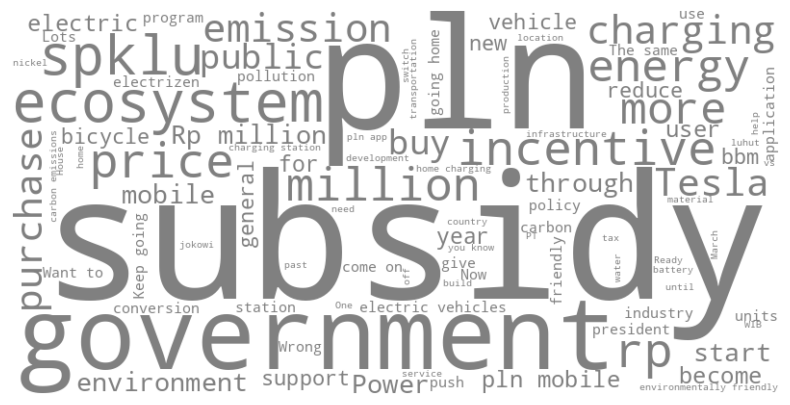

In [39]:
# Define a function that returns grey colors
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "grey"

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, color_func=grey_color_func, background_color='white').generate_from_frequencies(dict(pos_top100))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
neg_top100 = freq[:100]

# Translate the words from Bahasa Indonesia to English
neg_top100 = [(GoogleTranslator(source='id', target='en').translate(word), freq) for word, freq in neg_top100]

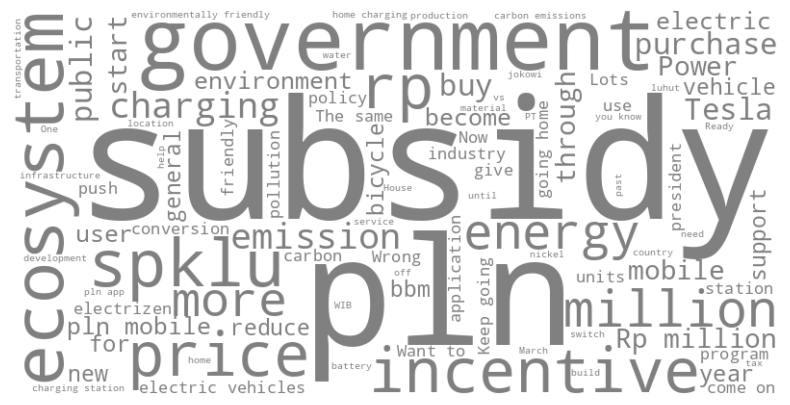

In [41]:
#Negative
wordcloud = WordCloud(width=800, height=400, max_words=100, color_func=grey_color_func, background_color='white').generate_from_frequencies(dict(neg_top100))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
neu_top100 = freq[:100]

# Translate the words from Bahasa Indonesia to English
neu_top100 = [(GoogleTranslator(source='id', target='en').translate(word), freq) for word, freq in neu_top100]

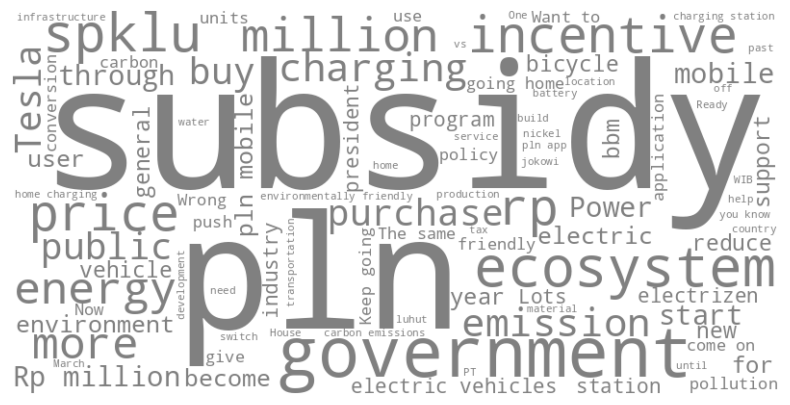

In [43]:
#Neutral
wordcloud = WordCloud(width=800, height=400, max_words=100, color_func=grey_color_func, background_color='white').generate_from_frequencies(dict(neu_top100))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Aspect Wordcloud

In [44]:
aspect_df['text_cleaned'] = aspect_df['sequence'].progress_apply(preprocessing)

  0%|          | 0/23729 [00:00<?, ?it/s]

In [45]:
driving_range = aspect_df[aspect_df['driving range'] == True]
battery_life = aspect_df[aspect_df['battery life'] == True]
charging_time = aspect_df[aspect_df['charging time'] == True]
charging_infrastructure = aspect_df[aspect_df['charging infrastructure'] == True]
price_value = aspect_df[aspect_df['price value'] == True]
incentive_policy = aspect_df[aspect_df['incentive policy'] == True]
environmental_concern = aspect_df[aspect_df['environmental concern'] == True]
look_and_design = aspect_df[aspect_df['look and design'] == True]

In [46]:
driving_range_words = ''
for wordlist in driving_range['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    driving_range_words += " ".join(tokens)+" "

battery_life_words = ''
for wordlist in battery_life['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    battery_life_words += " ".join(tokens)+" "

charging_time_words = ''
for wordlist in charging_time['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    charging_time_words += " ".join(tokens)+" "

charging_infrastructure_words = ''
for wordlist in charging_infrastructure['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    charging_infrastructure_words += " ".join(tokens)+" "

price_value_words = ''
for wordlist in price_value['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    price_value_words += " ".join(tokens)+" "

incentive_policy_words = ''
for wordlist in incentive_policy['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    incentive_policy_words += " ".join(tokens)+" "

environmental_concern_words = ''
for wordlist in environmental_concern['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    environmental_concern_words += " ".join(tokens)+" "

look_and_design_words = ''
for wordlist in look_and_design['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    look_and_design_words += " ".join(tokens)+" "

In [47]:
# Create the word vector with unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2))

X_incentive = vectorizer.fit_transform([incentive_policy_words])
freqIncentive = zip(vectorizer.get_feature_names_out(), X_incentive.sum(axis=0).tolist()[0])
# Sort by frequency
freqIncentive = sorted(freqIncentive, key=lambda x: -x[1])


X_environment = vectorizer.fit_transform([environmental_concern_words])
freqEnvironment = zip(vectorizer.get_feature_names_out(), X_environment.sum(axis=0).tolist()[0])
# Sort by frequency
freqEnvironment = sorted(freqEnvironment, key=lambda x: -x[1])


X_price = vectorizer.fit_transform([price_value_words])
freqPrice = zip(vectorizer.get_feature_names_out(), X_price.sum(axis=0).tolist()[0])
# Sort by frequency
freqPrice = sorted(freqPrice, key=lambda x: -x[1])


X_charging = vectorizer.fit_transform([charging_infrastructure_words])
freqCharging = zip(vectorizer.get_feature_names_out(), X_charging.sum(axis=0).tolist()[0])
# Sort by frequency
freqCharging = sorted(freqCharging, key=lambda x: -x[1])

In [48]:
incentive_top100 = freqIncentive[:100]
environment_top100 = freqEnvironment[:100]
price_top100 = freqPrice[:100]
charging_top100 = freqCharging[:100]


# Translate the words from Bahasa Indonesia to English
incentive_top100 = [(GoogleTranslator(source='id', target='en').translate(word), freq) for word, freq in incentive_top100]
environment_top100 = [(GoogleTranslator(source='id', target='en').translate(word), freq) for word, freq in environment_top100]
price_top100 = [(GoogleTranslator(source='id', target='en').translate(word), freq) for word, freq in price_top100]
charging_top100 = [(GoogleTranslator(source='id', target='en').translate(word), freq) for word, freq in charging_top100]

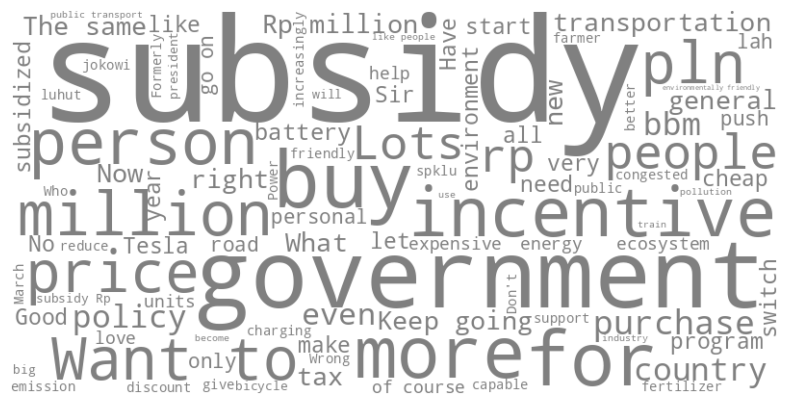

In [49]:
# Generate incentive policy word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, color_func=grey_color_func, background_color='white').generate_from_frequencies(dict(incentive_top100))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

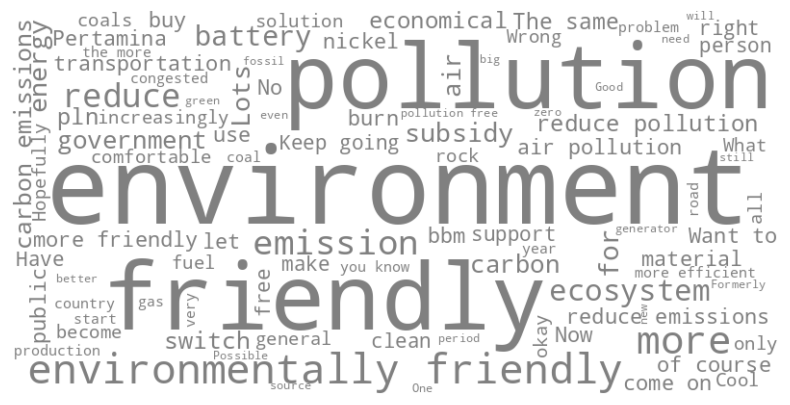

In [50]:
# Generate environmental concern word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, color_func=grey_color_func, background_color='white').generate_from_frequencies(dict(environment_top100))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

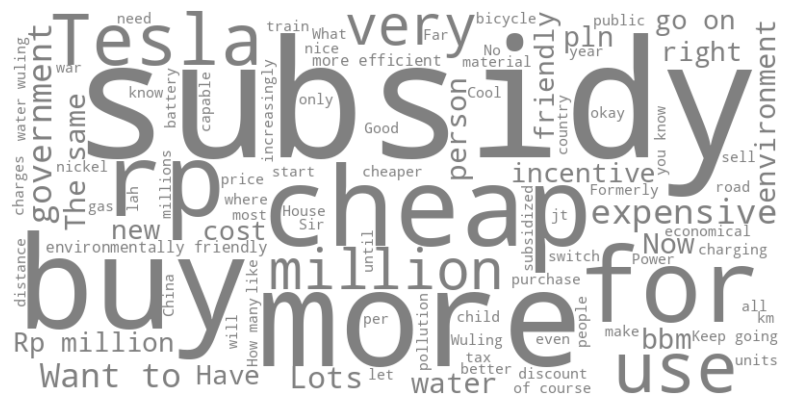

In [51]:
# Generate price value word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, color_func=grey_color_func, background_color='white').generate_from_frequencies(dict(price_top100))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

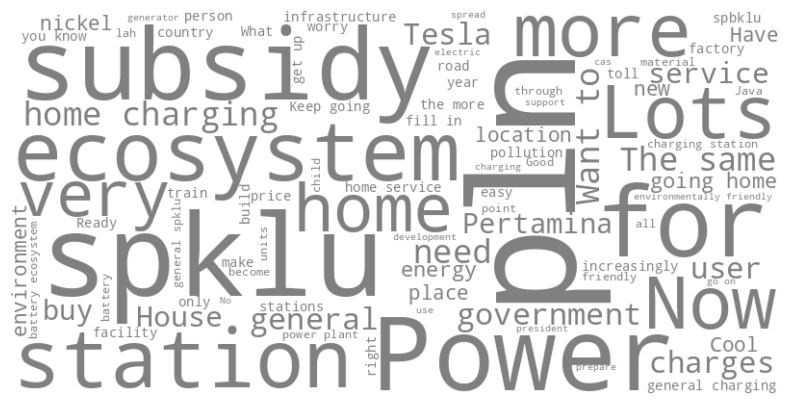

In [52]:
# Generate charging infrastructure word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, color_func=grey_color_func, background_color='white').generate_from_frequencies(dict(charging_top100))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()